In [72]:
import pandas as pd
import matplotlib.pyplot  as plt
import matplotlib.lines as lines
import statsmodels.api as sm
import numpy as np

## Read in data, remove listing with 0 for rent

In [73]:
area = "Seattle, WA"
path = "./data/"+area
vendor_info_df = pd.read_csv(path + "_vendor_info.csv")
listing_info_df = pd.read_csv(path + "_listing_info.csv")
listing_info_df = listing_info_df[listing_info_df.rent != 0]

## Merge listing and vendor info df removing dupes in vendor info

In [74]:
joined_df = listing_info_df.join(vendor_info_df.drop('Unnamed: 0', axis = 1).drop_duplicates()
                     .set_index('propertyName'), on='propertyName', how = 'inner')

## One_hot Neighborhood and Bedroom Type

In [75]:
neigh = np.asarray(joined_df['neighborhood'].astype(str))
neigh_one_hot = sm.tools.categorical(neigh, drop=True)
bedType = np.asarray(joined_df['bedRoomType'].astype(str))
bedType_one_hot = sm.tools.categorical(bedType, drop=True)

## Create one_hot dicts to put into df

In [76]:
set_neigh = sorted(joined_df['neighborhood'].drop_duplicates().astype(str))
set_bedType = sorted(joined_df['bedRoomType'].drop_duplicates().astype(str))
neigh_dic = dict(zip(set_neigh, neigh_one_hot.T))
bedType_dic = dict(zip(set_bedType, bedType_one_hot.T))

## Drop useless columns

In [77]:
dropped_df = joined_df.drop(['Unnamed: 0', 'rent', 'propertyName', 'bedRoomType', 'availability', 'deposit', 'unit', 'leaseLength', 'name', 'applyNow', 'street', 'city',
               'state', 'zipCode', 'neighborhood', 'new', 'reviewScore', 'reviewCount'], axis = 1)

## Create df with one_hots and useful columns

In [78]:
neigh_dic.update(bedType_dic)
neigh_dic.update(dropped_df.to_dict('list'))
prepped_df = pd.DataFrame(neigh_dic)

## Run regression with constant and print summary

In [79]:
X = np.asarray(prepped_df[prepped_df.columns])
Y = joined_df["rent"]
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   rent   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     225.5
Date:                Sun, 31 May 2020   Prob (F-statistic):               0.00
Time:                        20:21:48   Log-Likelihood:                -56909.
No. Observations:                7361   AIC:                         1.140e+05
Df Residuals:                    7267   BIC:                         1.147e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1127.2971     76.142    -14.805      0.000   -1276.557    -978.038
x1           527.5736    249.716      2.113      0.035      38.059    1017.089
x2           117.6162    324.894      0.362      0.717    -519.271     754.504
x3           115.1830     50.961      2.260      0.024      15.285     215.081
x4           109.2368     51.074      2.139      0.032       9.116     209.358
x5          -428.5019    247.777     -1.729      0.084    -914.217      57.213
x6            18.3636     67.283      0.273      0.785    -113.531     150.258
x7          -326.0109     66.840     -4.877      0.000    -457.036    -194.986
x8         -2229.6151    552.773     -4.034      0.000   -3313.211   -1146.019
x9           -80.0314     66.450     -1.204      0.228    -210.293      50.230
x10         -378.5314    176.645     -2.143      0.032    -724.807     -32.256
x11         -449.7744    246.825     -1.822      0.068    -933.624      34.075
x12           78.4846    145.622      0.539      0.590    -206.977     363.947
x13           49.9464     63.582      0.786      0.432     -74.693     174.585
x14          -63.5355    132.554     -0.479      0.632    -323.380     196.309
x15         -243.6090    100.345     -2.428      0.015    -440.314     -46.904
x16          -24.6707     79.898     -0.309      0.757    -181.294     131.953
x17           13.0672    195.685      0.067      0.947    -370.533     396.667
x18          484.6772     69.474      6.976      0.000     348.488     620.866
x19          -35.3017     81.138     -0.435      0.664    -194.357     123.753
x20         -800.6468    149.934     -5.340      0.000   -1094.561    -506.733
x21          365.6290     79.619      4.592      0.000     209.553     521.705
x22         -146.3535     76.802     -1.906      0.057    -296.907       4.200
x23        -1745.1677    552.703     -3.158      0.002   -2828.625    -661.710
x24         -115.5676     69.510     -1.663      0.096    -251.827      20.692
x25          128.9379     63.609      2.027      0.043       4.245     253.631
x26         -563.6330    550.039     -1.025      0.306   -1641.869     514.603
x27         -173.4579     60.216     -2.881      0.004    -291.498     -55.417
x28         -191.4255    388.919     -0.492      0.623    -953.820     570.969
x29           -3.7553     60.334     -0.062      0.950    -122.027     114.517
x30         -207.0917     69.289     -2.989      0.003    -342.918     -71.266
x31         -661.9501    317.953     -2.082      0.037   -1285.230     -38.670
x32           18.3894    549.992      0.033      0.973   -1059.754    1096.533
x33           91.8047    100.101      0.917      0.359    -104.422     288.031
x34           45.4489    149.203      0.305      0.761    -247.032     337.929
x35          164.9545    122.546      1.346      0.178     -75.271     405.180
x3

## Print variable names and coefficients 

In [80]:
dict(zip(np.insert(np.array(prepped_df.columns), 0, 'Constant'), np.asarray(model.params)))

{'Alki': 527.5736253619184,
 'Arbor Heights': 117.61623851370138,
 'Atlantic': 115.18298827672132,
 'Ballard': 109.23680425407767,
 'Beacon Hill': -428.50193556543536,
 'Belltown': 18.363572503429804,
 'Bitter Lake': -326.01094170337183,
 'Briarcliff': -2229.6150756254797,
 'Brighton': -80.031351939667303,
 'Broadview': -378.53141299454035,
 'Bryant': -449.77444176017497,
 'Bryn Mawr-Skyway': 78.484571056883766,
 'Capitol Hill': 49.946431053700579,
 'Central Seattle': -63.53547267767982,
 'Chinatown': -243.60900970579976,
 'Columbia City': -24.670698272354706,
 'Constant': -1127.2971017654413,
 'Crown Hill': 13.067152279841054,
 'Denny Triangle': 484.6772019514957,
 'Downtown Seattle': -35.301726304800873,
 'Dunlap': -800.64675127366104,
 'Eastlake': 365.62902293324032,
 'Fairmount Park': -146.35349704775788,
 'Fauntleroy': -1745.1677048865504,
 'First Hill': -115.56761362077187,
 'Fremont': 128.93791997948324,
 'Gatewood': -563.63295898339595,
 'Genesee': -173.45785682638905,
 'George

## Plot predicted vs actual rent

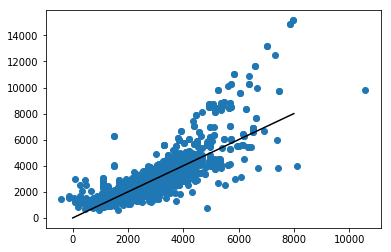

In [81]:
plt.plot(model.predict(X), joined_df['rent'], 'o')
plt.plot([1, 8000], [1, 8000], 'k-')
plt.show()

## Add predicted rent and rent diff to dataframe

In [82]:
final_df = joined_df
final_df['predictedRent'] = model.predict(X)
final_df['rentDiff'] = final_df['rent'] - final_df['predictedRent']
#remove scientific notation
pd.options.display.float_format = '{:.5f}'.format
final_df

,Unnamed: 0,propertyName,bedRoomType,bedRoomNumber,baths,rent,sqft,availability,deposit,unit,...,city,state,zipCode,neighborhood,reviewScore,reviewCount,walkScore,transitScore,predictedRent,rentDiff
0,0,Jackson Apartments,Studio,1,1.00000,1790,465.00000,1,0,NaN,...,Seattle,WA,98144,Atlantic,0,0,90,70,1593.63754,196.36246
1,1,Jackson Apartments,Studio,1,1.00000,1905,475.00000,1,0,NaN,...,Seattle,WA,98144,Atlantic,0,0,90,70,1616.81204,288.18796
2,2,Jackson Apartments,Studio,1,1.00000,1920,570.00000,1,0,NaN,...,Seattle,WA,98144,Atlantic,0,0,90,70,1836.96982,83.03018
3,3,Jackson Apartments,Traditional,1,1.00000,2060,509.00000,1,0,NaN,...,Seattle,WA,98144,Atlantic,0,0,90,70,1709.70222,350.29778
4,4,Jackson Apartments,Traditional,1,1.00000,2070,657.00000,1,0,NaN,...,Seattle,WA,98144,Atlantic,0,0,90,70,2052.68486,17.31514
5,5,Jackson Apartments,Traditional,1,1.00000,2075,596.00000,1,0,NaN,...,Seattle,WA,98144,Atlantic,0,0,90,70,1911.32039,163.67961
6,6,Jackson Apartments,Traditional,1,1.00000,2075,597.00000,1,0,NaN,...,Seattle,WA,98144,Atlantic,0,0,90,70,1913.63784,161.36216
7,7,Jackson Apartments,Traditional,1,1.00000,2075,598.00000,1,0,NaN,...,Seattle,WA,98144,Atlantic,0,0,90,70,1915.95529,159.04471
8,8,Jackson Apartments,Traditional,1,1.00000,2075,620.00000,1,0,NaN,...,Seattle,WA,98144,Atlantic,0,0,90,70,1966.93920,108.06080
9,9,Jackson Apartments,Traditional,1,1.00000,2075,629.00000,1,0,NaN,...,Seattle,WA,98144,Atlantic,0,0,90,70,1987.79625,87.20375


## Output to csv sorted by rent diff

In [83]:
final_df.sort_values(by=['rentDiff']).to_csv(path + 'regResults.csv')